In [1]:
%matplotlib inline
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model,Sequential
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [10]:
filepath = "C:/Users/Bin/Documents/dataset1010/dataset/dataset1010"
data = pd.read_csv(filepath,header=None,usecols=range(1,10,1))
dataset = data.values  # convert dataframe to np.ndarray

#Scaling
scaler = MinMaxScaler()
scaler.fit(dataset)
s_dataset = scaler.transform(dataset)

In [17]:
# split into train and test sets
train_size = int(len(s_dataset) * 0.67)
test_size = len(s_dataset) - train_size
train, test = s_dataset[0:train_size,:], s_dataset[train_size:len(s_dataset),:]
print(len(train), len(test))

13424 6612


In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, timestep=1):
    dataX = []
    for i in range(len(dataset)-timestep+1):
        a = dataset[i:(i+timestep), :]
        dataX.append(a)
    return np.array(dataX)# convert an array of values into a dataset matrix
trainX, testX = create_dataset(train,10),create_dataset(test,10)

In [19]:
timesteps = 30
input_dim = data.shape[1]
latent_dim = 3
n_epoch = 30
n_batch = 10

In [26]:
inputs = Input(shape=(timesteps, input_dim))
encoded,state_h, state_c = LSTM(latent_dim,return_state= True)(inputs)
encoder_states = [state_h, state_c]
#print(encoder_states)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)#,initial_state=encoder_states)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)
sequence_autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

x_train = data.iloc[:15000,:]
X = pd.DataFrame.as_matrix(x_train)
X = s_dataset[:15000]
T = s_dataset[15000:18000]
X = np.reshape(X,(500,30,input_dim)) #reshape(samples,timesteps,dim)
T = np.reshape(T,(100,30,input_dim))
'''
history = sequence_autoencoder.fit(X,X,
                epochs=100,
                batch_size=100,
                validation_data=(T,T))
'''

ValueError: Input 0 is incompatible with layer lstm_24: expected ndim=3, found ndim=2

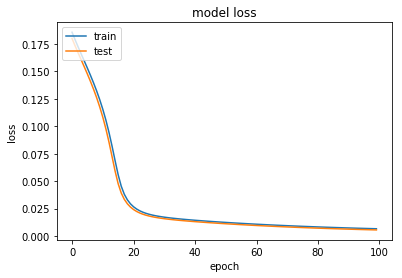

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from __future__ import print_function



from keras.models import Model

from keras.layers import Input, LSTM, Dense

import numpy as np



batch_size = 50  # Batch size for training.

epochs = 20  # Number of epochs to train for.

latent_dim = 5  # Latent dimensionality of the encoding space.
timesteps = 5
num_samples = train.shape[0]  # Number of samples to train on.

num_encoder_tokens = 9
num_decoder_tokens = 9
# Define an input sequence and process it.

encoder_inputs = Input(shape=(timesteps, num_encoder_tokens))

encoder = LSTM(latent_dim, return_state=True)

encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# We discard `encoder_outputs` and only keep the states.

encoder_states = [state_h, state_c]



# Set up the decoder, using `encoder_states` as initial state.

decoder_inputs = Input(shape=(None, num_decoder_tokens))

# We set up our decoder to return full output sequences,

# and to return internal states as well. We don't use the

# return states in the training model, but we will use them in inference.

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(decoder_inputs,

                                     initial_state=encoder_states)

decoder_dense = Dense(num_decoder_tokens, activation='softmax')

decoder_outputs = decoder_dense(decoder_outputs)



# Define the model that will turn

# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`

model = Model(encoder_inputs, decoder_outputs)



# Run training

model.compile(optimizer='adam', loss='mse')

model.fit(train, train,

          batch_size=batch_size,

          epochs=epochs,

          validation_split=0.2)

# Save model

#model.save('s2s.h5')



RuntimeError: Graph disconnected: cannot obtain value for tensor Tensor("input_9:0", shape=(?, ?, 9), dtype=float32) at layer "input_9". The following previous layers were accessed without issue: ['input_8']